In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

     --------------------------------------- 38.2/38.2 MB 21.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import cv2
from matplotlib import  pyplot as plt
img=cv2.imread("D:\\UCMerced_LandUse\\UCMerced_LandUse\\Images\\agricultural\\agricultural00.tif")

In [19]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [20]:
thresh1=cv2.adaptiveThreshold(img_grey,255,cv2.THRESH_BINARY,cv2.ADAPTIVE_THRESH_MEAN_C, 11, 2)

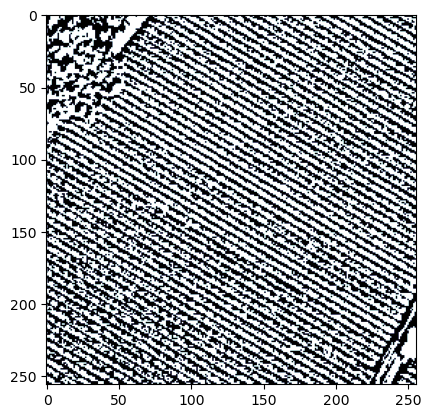

In [21]:
plt.imshow(thresh1,cmap='bone')

In [22]:
from numpy import  asarray
numpydata = asarray(thresh1)
print(numpydata)



[[  0 255   0 ... 255 255 255]
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]
 [  0   0   0 ...   0   0 255]]


In [23]:
b,g,r=cv2.split(img)

In [24]:
import cv2 as cv
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

In [25]:
def convert(img):
    adaptive_threshold, thresh1 = cv2.threshold(img, 120, 255, cv.THRESH_BINARY , cv.ADAPTIVE_THRESH_MEAN_C)
    return adaptive_threshold
   

In [28]:
import cv2 as cv
img=cv2.imread("D:\\UCMerced_LandUse\\UCMerced_LandUse\\Images\\agricultural\\agricultural31.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_threshold, thresh1 = cv2.threshold(img, 120, 255, cv.THRESH_BINARY , cv.ADAPTIVE_THRESH_MEAN_C)
print("Obtained threshold: ", adaptive_threshold)

Obtained threshold:  120.0


In [29]:
def binarisation(imgpath,label):
    array = []
    upper=0
    lower=0
    uppercount=0
    lowercount=0
   
    img = cv2.imread(r"{}".format(imgpath), cv2.IMREAD_UNCHANGED)
    b,g,r = cv2.split(img)
    index = 0
    for color in [b,g,r]:
        (thresh, binary)=cv2.threshold(color,120,255,cv.THRESH_BINARY , cv.ADAPTIVE_THRESH_MEAN_C)
        colorChannel = img[:,:,index]
        for i in range(len(binary)):
            for j in range(len(binary[0])):
                if(binary[i][j]==255):
                    upper=upper+colorChannel[i][j]
                    uppercount+=1
                else:
                    lower=lower+ colorChannel[i][j]
                    lowercount+=1
        try:
            U1 = upper/uppercount
            L1 = lower/lowercount
        except:
            U1 =0
            L1 = 0
        array.append(U1)
        array.append(L1)

    index+=1
    array.append(label)
    return array

In [31]:
import cv2
src = cv2.imread('D:\\UCMerced_LandUse\\UCMerced_LandUse\\Images\\agricultural\\agricultural31.tif', cv2.IMREAD_UNCHANGED)
binarisation('D:\\UCMerced_LandUse\\UCMerced_LandUse\\Images\\agricultural\\agricultural31.tif',"arr")

[136.87739281316468,
 101.51395785800564,
 130.1643689227937,
 96.57334719220985,
 132.63785085900344,
 104.67897068888915,
 'arr']

In [32]:
print()

In [35]:
import os
import pandas as pd

categories = os.listdir(f"D:\\Project\\UCMerced_LandUse\\UCMerced_LandUse\\Images")
array = []
array.append(["B1","B2","G1","G2","R1","R2","class"])
for folder in categories:
    print("current folder :" ,folder)
    for file in os.listdir(f"D:\\Project\\UCMerced_LandUse\\UCMerced_LandUse\Images\\{folder}"):
        filepath = f"D:\\Project\\UCMerced_LandUse\\UCMerced_LandUse\\Images\\{folder}\\{file}"
        array.append(binarisation(filepath,folder))
df = pd.DataFrame(array)
df.to_excel(f'D:\\Project\\adaptive thresholding\\sahiloutput.xlsx', index=False)




current folder : agricultural
current folder : airplane
current folder : baseballdiamond
current folder : beach
current folder : buildings
current folder : chaparral
current folder : denseresidential
current folder : forest
current folder : freeway
current folder : golfcourse
current folder : harbor
current folder : intersection
current folder : mediumresidential
current folder : mobilehomepark
current folder : overpass
current folder : parkinglot
current folder : river
current folder : runway
current folder : sparseresidential
current folder : storagetanks
current folder : tenniscourt
